In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
import warnings
warnings.simplefilter('ignore')

## Introduction

This notebook contains examples from _Introductory Econometrics: A Modern Approach, 6e_ by Jeffrey M. Wooldridge. Each example illustrates how to load data, build econometric models, and compute estimates with **Python**.

Now, install and load the `wooldridge` package and lets get started!

In [3]:
# !pip install wooldridge

In [4]:
from wooldridge import *

## Chapter 2: The Simple Regression Model

### **`Example 2.10:` A Log Wage Equation**

Load the `wage1` data and check out the documentation.

In [5]:
dataWoo('wage1', description=True)

name of dataset: wage1
no of variables: 24
no of observations: 526

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.  

The documentation indicates these are data from the 1976 Current Population Survey, collected by Henry Farber when he and Wooldridge were colleagues at MIT in 1988.

**$wage$:** average hourly earnings

**$educ$:** years of education

First, make a scatter-plot of the two variables and look for possible patterns in the relationship between them.

In [6]:
wage1 = dataWoo('wage1')

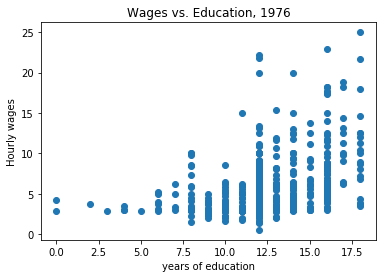

In [7]:
plt.scatter(wage1.educ, wage1.wage)
plt.title("Wages vs. Education, 1976")
plt.xlabel("years of education")
plt.ylabel("Hourly wages")
plt.show()

It appears that _**on average**_, more years of education, leads to higher wages.

The example in the text investigates what the _**percentage**_ change between wages and education might be. So, we must use the $log($`wage`$)$.

Build a linear model to estimate the relationship between the _log of wage_ (`lwage`) and _education_ (`educ`).

$$\widehat{log(wage)} = \beta_0 + \beta_1educ$$

In [8]:
y = wage1.lwage
x = wage1.educ

model = sm.OLS(x, y)
results = model.fit()

Print the `summary` of the results.

In [9]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                   educ   R-squared (uncentered):                   0.916
Model:                            OLS   Adj. R-squared (uncentered):              0.916
Method:                 Least Squares   F-statistic:                              5717.
Date:                Sat, 09 May 2020   Prob (F-statistic):                   2.18e-284
Time:                        15:36:54   Log-Likelihood:                         -1438.9
No. Observations:                 526   AIC:                                      2880.
Df Residuals:                     525   BIC:                                      2884.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Plot the $log($`wage`$)$ vs `educ`, adding a line representing the least squares
fit.

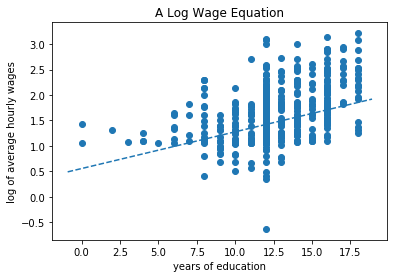

In [10]:
x_with_const = sm.add_constant(x)

model = sm.OLS(x_with_const, y)
results = model.fit()

slope, intercept = results.params[1].values/100, results.params[0].values


def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')


plt.scatter(x, y)
abline(slope, intercept)
plt.title("A Log Wage Equation")
plt.xlabel("years of education")
plt.ylabel("log of average hourly wages")
plt.show()

## Chapter 3: Multiple Regression Analysis: Estimation

### **`Example 3.2:` Hourly Wage Equation**

Check the documentation for variable information

In [11]:
dataWoo('wage1', description=True)

name of dataset: wage1
no of variables: 24
no of observations: 526

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| wage     | average hourly earnings         |
| educ     | years of education              |
| exper    | years potential experience      |
| tenure   | years with current employer     |
| nonwhite | =1 if nonwhite                  |
| female   | =1 if female                    |
| married  | =1 if married                   |
| numdep   | number of dependents            |
| smsa     | =1 if live in SMSA              |
| northcen | =1 if live in north central U.S |
| south    | =1 if live in southern region   |
| west     | =1 if live in western region    |
| construc | =1 if work in construc. indus.  |
| ndurman  | =1 if in nondur. manuf. indus.  |
| trcommpu | =1 if in trans, commun, pub ut  |
| trade    | =1 if in wholesale or retail    |
| services | =1 if in services indus.  

**$lwage$:** log of the average hourly earnings

**$educ$:** years of education

**$exper$:** years of potential experience

**$tenutre$:** years with current employer

Plot the variables against `lwage` and compare their distributions
and slope ($\beta$) of the simple regression lines.


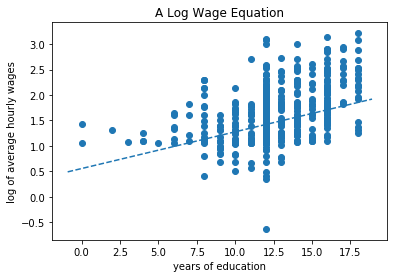

In [12]:
y = wage1.lwage
x = wage1.educ

model = sm.OLS(x, y)
results = model.fit()

x_with_const = sm.add_constant(x)

model = sm.OLS(x_with_const, y)
results = model.fit()

slope, intercept = results.params[1].values/100, results.params[0].values

plt.scatter(x, y)
abline(slope, intercept)
plt.title("A Log Wage Equation")
plt.xlabel("years of education")
plt.ylabel("log of average hourly wages")
plt.show()

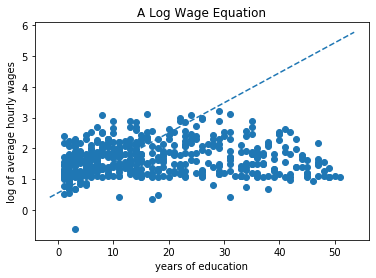

In [13]:
y = wage1.lwage
x = wage1.exper

model = sm.OLS(x, y)
results = model.fit()

x_with_const = sm.add_constant(x)

model = sm.OLS(x_with_const, y)
results = model.fit()

slope, intercept = results.params[1].values/100, results.params[0].values

plt.scatter(x, y)
abline(slope, intercept)
plt.title("A Log Wage Equation")
plt.xlabel("years of education")
plt.ylabel("log of average hourly wages")
plt.show()

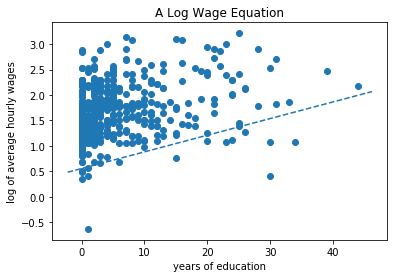

In [14]:
y = wage1.lwage
x = wage1.tenure

model = sm.OLS(x, y)
results = model.fit()

x_with_const = sm.add_constant(x)

model = sm.OLS(x_with_const, y)
results = model.fit()

slope, intercept = results.params[1].values/100, results.params[0].values

plt.scatter(x, y)
abline(slope, intercept)
plt.title("A Log Wage Equation")
plt.xlabel("years of education")
plt.ylabel("log of average hourly wages")
plt.show()

Estimate the model regressing _educ_, _exper_, and _tenure_ against _log(wage)_.

$$\widehat{log(wage)} = \beta_0 + \beta_1educ + \beta_3exper + \beta_4tenure$$

In [15]:
results = smf.ols("lwage ~ educ + exper + tenure", data=wage1).fit()
results.params

Intercept    0.284360
educ         0.092029
exper        0.004121
tenure       0.022067
dtype: float64

In [16]:
coef_df = pd.DataFrame(results.params)
coef_df.drop(index=['Intercept'], inplace=True)
coef_df.rename(columns={0: "coef"}, inplace=True)

In [17]:
coef_df

,coef
educ,0.092029
exper,0.004121
tenure,0.022067


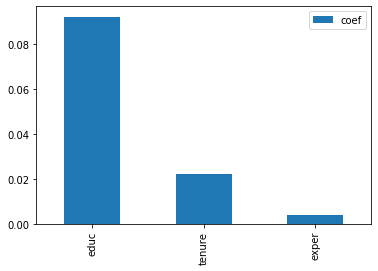

In [18]:
coef_df.sort_values(by='coef', ascending=False).plot.bar()

## Chapter 4: Multiple Regression Analysis: Inference

### **`Example 4.1` Hourly Wage Equation**

Using the same model estimated in **`example: 3.2`**, examine and compare the standard errors associated with each coefficient. Like the textbook, these are contained in parenthesis next to each associated coefficient.

In [19]:
results = smf.ols("lwage ~ educ + exper + tenure", data=wage1).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  lwage   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     80.39
Date:                Sat, 09 May 2020   Prob (F-statistic):           9.13e-43
Time:                        15:36:55   Log-Likelihood:                -313.55
No. Observations:                 526   AIC:                             635.1
Df Residuals:                     522   BIC:                             652.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2844      0.104      2.729      0.007       0.080       0.489
educ           0.0920      0.007     12.555      0.000       0.078       0.106
exper          0.0041      0.002      2.391      0.017       0.001       0.008
tenure         0.0221      0.003      7.133      0.000       0.016       0.028
==============================================================================
Omnibus:                       11.534   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               20.941
Skew:                           0.021   Prob(JB):                     2.84e-05
Kurtosis:                       3.977   Cond. No.                         135.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
results.params[2]/results.bse[2]

2.3914371073142298

### **`Example 4.7` Effect of Job Training on Firm Scrap Rates**

Load the `jtrain` data set. 

In [21]:
dataWoo('jtrain', description=True)

name of dataset: jtrain
no of variables: 30
no of observations: 471

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| year     | 1987, 1988, or 1989             |
| fcode    | firm code number                |
| employ   | # employees at plant            |
| sales    | annual sales, $                 |
| avgsal   | average employee salary         |
| scrap    | scrap rate (per 100 items)      |
| rework   | rework rate (per 100 items)     |
| tothrs   | total hours training            |
| union    | =1 if unionized                 |
| grant    | = 1 if received grant           |
| d89      | = 1 if year = 1989              |
| d88      | = 1 if year = 1988              |
| totrain  | total employees trained         |
| hrsemp   | tothrs/totrain                  |
| lscrap   | log(scrap)                      |
| lemploy  | log(employ)                     |
| lsales   | log(sales)               

In [22]:
jtrain = dataWoo('jtrain')
jtrain_subset = jtrain[jtrain.year == 1987][['year', 'union', 'lscrap',
                                             'hrsemp', 'lsales', 'lemploy']]
jtrain_subset.head()

,year,union,lscrap,hrsemp,lsales,lemploy
0,1987,0,NaN,12.0,17.665659,4.605170
3,1987,0,NaN,12.0,14.260197,2.484907
6,1987,0,NaN,37.5,13.527828,2.995732
9,1987,0,NaN,0.0,16.982714,5.298317
12,1987,0,NaN,NaN,15.607270,NaN


In [23]:
jtrain_subset.isnull().sum()

year         0
union        0
lscrap     103
hrsemp      28
lsales      38
lemploy     13
dtype: int64

In [24]:
jtrain_clean = jtrain_subset.dropna()

Now create the linear model regressing `hrsemp`(total hours training/total employees trained), `lsales`(log of annual sales), and `lemploy`(the log of the number of the employees), against `lscrap`(the log of the scrape rate).

$$lscrap = \alpha + \beta_1 hrsemp + \beta_2 lsales + \beta_3 lemploy$$

In [25]:
results = smf.ols("lscrap ~ hrsemp + lsales + lemploy",
                  data=jtrain_clean).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lscrap   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.257
Method:                 Least Squares   F-statistic:                     5.838
Date:                Sat, 09 May 2020   Prob (F-statistic):            0.00215
Time:                        15:36:55   Log-Likelihood:                -70.198
No. Observations:                  43   AIC:                             148.4
Df Residuals:                      39   BIC:                             155.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.7443      4.575      2.567      0.014       2.491      20.997
hrsemp        -0.0422      0.019     -2.259      0.030      -0.080      -0.004
lsales        -0.9506      0.370     -2.570      0.014      -1.699      -0.203
lemploy        0.9921      0.357      2.780      0.008       0.270       1.714
==============================================================================
Omnibus:                        1.109   Durbin-Watson:                   2.163
Prob(Omnibus):                  0.574   Jarque-Bera (JB):                0.934
Skew:                           0.093   Prob(JB):                        0.627
Kurtosis:                       2.302   Cond. No.                         417.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Chapter 5: Multiple Regression Analysis: OLS Asymptotics

### **`Example 5.1:` Housing Prices and Distance From an Incinerator**

Load the `hprice3` data set.

In [26]:
dataWoo('hprice3', description=True)

name of dataset: hprice3
no of variables: 19
no of observations: 321

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| year     | 1978, 1981                      |
| age      | age of house                    |
| agesq    | age^2                           |
| nbh      | neighborhood, 1-6               |
| cbd      | dist. to cent. bus. dstrct, ft. |
| inst     | dist. to interstate, ft.        |
| linst    | log(inst)                       |
| price    | selling price                   |
| rooms    | # rooms in house                |
| area     | square footage of house         |
| land     | square footage lot              |
| baths    | # bathrooms                     |
| dist     | dist. from house to incin., ft. |
| ldist    | log(dist)                       |
| lprice   | log(price)                      |
| y81      | =1 if year = 1981               |
| larea    | log(area)               

In [27]:
hprice3 = dataWoo('hprice3')

Next, model the $log($`price`$)$ against the $log($`dist`$)$ to estimate the percentage relationship between the two.

In [28]:
price_dist_model = smf.ols("lprice ~ ldist", data=hprice3).fit()

Create another model that controls for "quality" variables, such as square footage `area` per house.

In [29]:
price_area_model = smf.ols("lprice ~ ldist + larea", data=hprice3).fit()

In [30]:
price_dist_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     43.48
Date:                Sat, 09 May 2020   Prob (F-statistic):           1.78e-10
Time:                        15:36:55   Log-Likelihood:                -169.60
No. Observations:                 321   AIC:                             343.2
Df Residuals:                     319   BIC:                             350.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.2575      0.474     17.427      0.000       7.325       9.190
ldist          0.3172      0.048      6.594      0.000       0.223       0.412
==============================================================================
Omnibus:                        3.073   Durbin-Watson:                   0.944
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                2.868
Skew:                           0.228   Prob(JB):                        0.238
Kurtosis:                       3.079   Cond. No.                         205.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
price_area_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.471
Method:                 Least Squares   F-statistic:                     143.2
Date:                Sat, 09 May 2020   Prob (F-statistic):           4.53e-45
Time:                        15:36:55   Log-Likelihood:                -87.041
No. Observations:                 321   AIC:                             180.1
Df Residuals:                     318   BIC:                             191.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.4939      0.491      7.121      0.000       2.529       4.459
ldist          0.1962      0.038      5.142      0.000       0.121       0.271
larea          0.7837      0.054     14.625      0.000       0.678       0.889
==============================================================================
Omnibus:                       13.639   Durbin-Watson:                   1.118
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.845
Skew:                          -0.334   Prob(JB):                     8.09e-05
Kurtosis:                       3.982   Cond. No.                         345.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Chapter 6: Multiple Regression: Further Issues

### **`Example 6.1:` Effects of Pollution on Housing Prices, standardized.**

Load the `hprice2` data and view the documentation.

In [32]:
dataWoo('hprice2', description=True)

name of dataset: hprice2
no of variables: 12
no of observations: 506

+----------+-------------------------------+
| variable | label                         |
+----------+-------------------------------+
| price    | median housing price, $       |
| crime    | crimes committed per capita   |
| nox      | nit ox concen; parts per 100m |
| rooms    | avg number of rooms           |
| dist     | wght dist to 5 employ centers |
| radial   | access. index to rad. hghwys  |
| proptax  | property tax per $1000        |
| stratio  | average student-teacher ratio |
| lowstat  | perc of people 'lower status' |
| lprice   | log(price)                    |
| lnox     | log(nox)                      |
| lproptax | log(proptax)                  |
+----------+-------------------------------+

D. Harrison and D.L. Rubinfeld (1978), “Hedonic Housing Prices and the
Demand for Clean Air,” by Harrison, D. and D.L.Rubinfeld, Journal of
Environmental Economics and Management 5, 81-102. Diego Garcia, a
for

$$price = \beta_0 + \beta_1nox + \beta_2crime + \beta_3rooms + \beta_4dist + \beta_5stratio + \mu$$

Estimate the usual `lm` model.

In [33]:
hprice2 = dataWoo('hprice2')
housing_level = smf.ols("price ~ nox + crime + rooms + dist + stratio",
                        data=hprice2).fit()

Estimate the same model, but standardized coefficients by wrapping each variable with R’s scale function:

$$\widehat{zprice} = \beta_1znox + \beta_2zcrime + \beta_3zrooms + \beta_4zdist + \beta_5zstratio$$

In [34]:
from sklearn.preprocessing import scale

zprice = pd.DataFrame({"zprice":scale(hprice2["price"])})
znox = pd.DataFrame({"znox":scale(hprice2["nox"])})
zcrime = pd.DataFrame({"zcrime":scale(hprice2["crime"])})
zrooms = pd.DataFrame({"zrooms":scale(hprice2["rooms"])})
zdist = pd.DataFrame({"zdist":scale(hprice2["dist"])})
zstratio = pd.DataFrame({"zstratio":scale(hprice2["stratio"])})
hprice2 = pd.concat([hprice2, zprice, znox, zcrime, zrooms, zdist, zstratio],axis=1)

housing_standardized = smf.ols("zprice ~ znox + zcrime + zrooms + zdist + zstratio"
                               , data = hprice2).fit()

In [35]:
housing_level.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     174.5
Date:                Sat, 09 May 2020   Prob (F-statistic):          3.61e-107
Time:                        15:36:56   Log-Likelihood:                -5080.8
No. Observations:                 506   AIC:                         1.017e+04
Df Residuals:                     500   BIC:                         1.020e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.087e+04   5054.599      4.129      0.000    1.09e+04    3.08e+04
nox        -2706.4326    354.087     -7.643      0.000   -3402.114   -2010.751
crime       -153.6010     32.929     -4.665      0.000    -218.297     -88.905
rooms       6735.4983    393.604     17.112      0.000    5962.177    7508.819
dist       -1026.8063    188.108     -5.459      0.000   -1396.386    -657.227
stratio    -1149.2038    127.429     -9.018      0.000   -1399.566    -898.842
==============================================================================
Omnibus:                      272.145   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2647.578
Skew:                           2.150   Prob(JB):                         0.00
Kurtosis:                      13.348   Cond. No.                         432.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
housing_standardized.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 zprice   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     174.5
Date:                Sat, 09 May 2020   Prob (F-statistic):          3.61e-107
Time:                        15:36:56   Log-Likelihood:                -462.53
No. Observations:                 506   AIC:                             937.1
Df Residuals:                     500   BIC:                             962.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.368e-17      0.027   3.47e-15      1.000      -0.053       0.053
znox          -0.3404      0.045     -7.643      0.000      -0.428      -0.253
zcrime        -0.1433      0.031     -4.665      0.000      -0.204      -0.083
zrooms         0.5139      0.030     17.112      0.000       0.455       0.573
zdist         -0.2348      0.043     -5.459      0.000      -0.319      -0.150
zstratio      -0.2703      0.030     -9.018      0.000      -0.329      -0.211
==============================================================================
Omnibus:                      272.145   Durbin-Watson:                   0.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2647.578
Skew:                           2.150   Prob(JB):                         0.00
Kurtosis:                      13.348   Cond. No.                         3.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **`Example 6.2:` Effects of Pollution on Housing Prices, Quadratic Interactive Term**

Modify the housing model from **`example 4.5`**, adding a quadratic term in _rooms_: 

$$log(price) = \beta_0 + \beta_1log(nox) + \beta_2log(dist) + \beta_3rooms + \beta_4rooms^2 + \beta_5stratio + \mu$$

In [37]:
ldist = pd.DataFrame({"ldist":np.log(hprice2["dist"])})
roomssq = pd.DataFrame({"roomssq":hprice2["rooms"]**2})
hprice2 = pd.concat([hprice2, ldist, roomssq],axis=1)

housing_model_4_5 = smf.ols("lprice ~ lnox + ldist + rooms + stratio"
                            , data=hprice2).fit()
housing_model_6_2 = smf.ols("lprice ~ lnox + ldist + rooms + roomssq + stratio"
                            , data=hprice2).fit()

In [38]:
housing_model_4_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     175.9
Date:                Sat, 09 May 2020   Prob (F-statistic):           5.53e-94
Time:                        15:36:56   Log-Likelihood:                -43.495
No. Observations:                 506   AIC:                             96.99
Df Residuals:                     501   BIC:                             118.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.0839      0.318     34.843      0.000      10.459      11.709
lnox          -0.9535      0.117     -8.168      0.000      -1.183      -0.724
ldist         -0.1343      0.043     -3.117      0.002      -0.219      -0.050
rooms          0.2545      0.019     13.736      0.000       0.218       0.291
stratio       -0.0525      0.006     -8.894      0.000      -0.064      -0.041
==============================================================================
Omnibus:                       61.317   Durbin-Watson:                   0.682
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              480.143
Skew:                           0.051   Prob(JB):                    5.47e-105
Kurtosis:                       7.771   Cond. No.                         560.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
housing_model_6_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     151.8
Date:                Sat, 09 May 2020   Prob (F-statistic):           7.89e-98
Time:                        15:36:56   Log-Likelihood:                -31.806
No. Observations:                 506   AIC:                             75.61
Df Residuals:                     500   BIC:                             101.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.3855      0.566     23.630      0.000      12.273      14.498
lnox          -0.9017      0.115     -7.862      0.000      -1.127      -0.676
ldist         -0.0868      0.043     -2.005      0.045      -0.172      -0.002
rooms         -0.5451      0.165     -3.295      0.001      -0.870      -0.220
roomssq        0.0623      0.013      4.862      0.000       0.037       0.087
stratio       -0.0476      0.006     -8.129      0.000      -0.059      -0.036
==============================================================================
Omnibus:                       56.649   Durbin-Watson:                   0.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              384.168
Skew:                          -0.100   Prob(JB):                     3.79e-84
Kurtosis:                       7.264   Cond. No.                     2.30e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Chapter 7: Multiple Regression Analysis with Qualitative Information 

### **`Example 7.4:` Housing Price Regression, Qualitative Binary variable**

This time, use the `hrprice1` data. 

In [40]:
dataWoo('hprice1', description=True)

name of dataset: hprice1
no of variables: 10
no of observations: 88

+----------+------------------------------+
| variable | label                        |
+----------+------------------------------+
| price    | house price, $1000s          |
| assess   | assessed value, $1000s       |
| bdrms    | number of bdrms              |
| lotsize  | size of lot in square feet   |
| sqrft    | size of house in square feet |
| colonial | =1 if home is colonial style |
| lprice   | log(price)                   |
| lassess  | log(assess                   |
| llotsize | log(lotsize)                 |
| lsqrft   | log(sqrft)                   |
+----------+------------------------------+

Collected from the real estate pages of the Boston Globe during 1990.
These are homes that sold in the Boston, MA area.


$$\widehat{log(price)} = \beta_0 + \beta_1log(lotsize) + \beta_2log(sqrft) + \beta_3bdrms + \beta_4colonial $$

Estimate the coefficients of the above linear model on the `hprice` data set.

In [41]:
hprice1 = dataWoo('hprice1')
housing_qualitative = smf.ols("lprice ~ llotsize + lsqrft + bdrms + colonial",
                              data=hprice1).fit()
housing_qualitative.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 lprice   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     38.38
Date:                Sat, 09 May 2020   Prob (F-statistic):           3.74e-18
Time:                        15:36:56   Log-Likelihood:                 26.619
No. Observations:                  88   AIC:                            -43.24
Df Residuals:                      83   BIC:                            -30.85
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3496      0.651     -2.073      0.041      -2.644      -0.055
llotsize       0.1678      0.038      4.395      0.000       0.092       0.244
lsqrft         0.7072      0.093      7.620      0.000       0.523       0.892
bdrms          0.0268      0.029      0.934      0.353      -0.030       0.084
colonial       0.0538      0.045      1.202      0.233      -0.035       0.143
==============================================================================
Omnibus:                       13.728   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               50.828
Skew:                          -0.053   Prob(JB):                     9.18e-12
Kurtosis:                       6.722   Cond. No.                         411.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Chapter 8: Heteroskedasticity

### **`Example 8.9:` Determinants of Personal Computer Ownership**

$$\widehat{PC} = \beta_0 + \beta_1hsGPA + \beta_2ACT + \beta_3parcoll + \beta_4colonial $$
Christopher Lemmon, a former MSU undergraduate, collected these data from a survey he took of MSU students in Fall 1994. Load `gpa1` and create a new variable combining the `fathcoll` and `mothcoll`, into `parcoll`. This new column indicates if either parent went to college.

In [42]:
dataWoo('gpa1', description=True)

name of dataset: gpa1
no of variables: 29
no of observations: 141

+----------+--------------------------------+
| variable | label                          |
+----------+--------------------------------+
| age      | in years                       |
| soph     | =1 if sophomore                |
| junior   | =1 if junior                   |
| senior   | =1 if senior                   |
| senior5  | =1 if fifth year senior        |
| male     | =1 if male                     |
| campus   | =1 if live on campus           |
| business | =1 if business major           |
| engineer | =1 if engineering major        |
| colGPA   | MSU GPA                        |
| hsGPA    | high school GPA                |
| ACT      | 'achievement' score            |
| job19    | =1 if job <= 19 hours          |
| job20    | =1 if job >= 20 hours          |
| drive    | =1 if drive to campus          |
| bike     | =1 if bicycle to campus        |
| walk     | =1 if walk to campus           |
| voluntr  | 

In [43]:
gpa1 = dataWoo('gpa1')

gpa1['parcoll'] = 0
gpa1.parcoll.loc[gpa1.fathcoll == 1 | gpa1.mothcoll] = 1

In [44]:
GPA_OLS = smf.ols("PC ~ hsGPA + ACT + parcoll", data=gpa1).fit()
GPA_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PC   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.087
Date:                Sat, 09 May 2020   Prob (F-statistic):              0.357
Time:                        15:36:56   Log-Likelihood:                -97.630
No. Observations:                 141   AIC:                             203.3
Df Residuals:                     137   BIC:                             215.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1107      0.492      0.225      0.822      -0.862       1.083
hsGPA          0.0489      0.138      0.354      0.724      -0.224       0.322
ACT            0.0014      0.016      0.090      0.929      -0.030       0.032
parcoll        0.1463      0.085      1.728      0.086      -0.021       0.314
==============================================================================
Omnibus:                     1290.376   Durbin-Watson:                   1.780
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.607
Skew:                           0.405   Prob(JB):                     2.03e-05
Kurtosis:                       1.262   Cond. No.                         298.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Chapter 9: More on Specification and Data Issues

### **`Example 9.8:` R&D Intensity and Firm Size**


$$rdintens = \beta_0 + \beta_1sales + \beta_2profmarg + \mu$$

From _Businessweek R&D Scoreboard_, October 25, 1991. Load the data and estimate the model.

In [45]:
rdchem = dataWoo("rdchem")

all_rdchem = smf.ols("rdintens ~ sales + profmarg", data=rdchem).fit()

In [46]:
all_rdchem.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               rdintens   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.195
Date:                Sat, 09 May 2020   Prob (F-statistic):              0.317
Time:                        15:36:56   Log-Likelihood:                -63.725
No. Observations:                  32   AIC:                             133.4
Df Residuals:                      29   BIC:                             137.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6253      0.586      4.484      0.000       1.428       3.823
sales       5.338e-05   4.41e-05      1.211      0.236   -3.68e-05       0.000
profmarg       0.0446      0.046      0.966      0.342      -0.050       0.139
==============================================================================
Omnibus:                       20.499   Durbin-Watson:                   1.694
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.349
Skew:                           1.674   Prob(JB):                     6.98e-07
Kurtosis:                       6.170   Cond. No.                     1.49e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So, we can estimate the model without that data point to gain a better understanding of how `sales` and `profmarg` describe `rdintens` for most firms. We can use the `subset` argument of the linear model function to indicate that we only want to estimate the model using data that is less than the highest sales.

In [47]:
rdchem_sub = rdchem[rdchem.sales < max(rdchem.sales)]

smallest_rdchem = smf.ols("rdintens ~ sales + profmarg", data=rdchem_sub).fit()

In [48]:
smallest_rdchem.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               rdintens   R-squared:                       0.173
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     2.925
Date:                Sat, 09 May 2020   Prob (F-statistic):             0.0702
Time:                        15:36:56   Log-Likelihood:                -60.496
No. Observations:                  31   AIC:                             127.0
Df Residuals:                      28   BIC:                             131.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2969      0.592      3.881      0.001       1.085       3.509
sales          0.0002   8.42e-05      2.204      0.036    1.31e-05       0.000
profmarg       0.0478      0.044      1.075      0.291      -0.043       0.139
==============================================================================
Omnibus:                       19.377   Durbin-Watson:                   1.694
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.558
Skew:                           1.623   Prob(JB):                     2.82e-06
Kurtosis:                       6.040   Cond. No.                     8.56e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.56e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Chapter 10: Basic Regression Analysis with Time Series Data

### **`Example 10.2:` Effects of Inflation and Deficits on Interest Rates**

$$\widehat{i3} = \beta_0 + \beta_1inf_t + \beta_2def_t$$
Data from the _Economic Report of the President, 2004_, Tables B-64, B-73, and B-79.

In [49]:
dataWoo("intdef", description=True)

name of dataset: intdef
no of variables: 13
no of observations: 56

+----------+----------------------------------+
| variable | label                            |
+----------+----------------------------------+
| year     | 1948 to 2003                     |
| i3       | 3 month T-bill rate              |
| inf      | CPI inflation rate               |
| rec      | federal receipts, % GDP          |
| out      | federal outlays, % GDP           |
| def      | out - rec                        |
| i3_1     | i3[_n-1]                         |
| inf_1    | inf[_n-1]                        |
| def_1    | def[_n-1]                        |
| ci3      | i3 - i3_1                        |
| cinf     | inf - inf_1                      |
| cdef     | def - def_1                      |
| y77      | =1 if year >= 1977; change in FY |
+----------+----------------------------------+

Economic Report of the President, 2004, Tables B-64, B-73, and B-79.


In [50]:
intdef = dataWoo("intdef")

In [51]:
intdef['infla'] = intdef['inf']
intdef['defla'] = intdef['def']

In [52]:
tbill_model = smf.ols("i3 ~ infla + defla", data=intdef).fit()
tbill_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     i3   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.587
Method:                 Least Squares   F-statistic:                     40.09
Date:                Sat, 09 May 2020   Prob (F-statistic):           2.48e-11
Time:                        15:36:56   Log-Likelihood:                -112.16
No. Observations:                  56   AIC:                             230.3
Df Residuals:                      53   BIC:                             236.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7333      0.432      4.012      0.000       0.867       2.600
infla          0.6059      0.082      7.376      0.000       0.441       0.771
defla          0.5131      0.118      4.334      0.000       0.276       0.751
==============================================================================
Omnibus:                        0.260   Durbin-Watson:                   0.716
Prob(Omnibus):                  0.878   Jarque-Bera (JB):                0.015
Skew:                          -0.028   Prob(JB):                        0.992
Kurtosis:                       3.058   Cond. No.                         9.28
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **`Example 10.11:` Seasonal Effects of Antidumping Filings**

C.M. Krupp and P.S. Pollard (1999), _Market Responses to Antidumpting Laws: Some Evidence from the U.S. Chemical Industry_, Canadian Journal of Economics 29, 199-227. Dr. Krupp kindly provided the data. They are monthly data covering February 1978 through December 1988. 

In [53]:
dataWoo("barium", description=True)

name of dataset: barium
no of variables: 31
no of observations: 131

+----------+---------------------------------+
| variable | label                           |
+----------+---------------------------------+
| chnimp   | Chinese imports, bar. chl.      |
| bchlimp  | total imports bar. chl.         |
| befile6  | =1 for all 6 mos before filing  |
| affile6  | =1 for all 6 mos after filing   |
| afdec6   | =1 for all 6 mos after decision |
| befile12 | =1 all 12 mos before filing     |
| affile12 | =1 all 12 mos after filing      |
| afdec12  | =1 all 12 mos after decision    |
| chempi   | chemical production index       |
| gas      | gasoline production             |
| rtwex    | exchange rate index             |
| spr      | =1 for spring months            |
| sum      | =1 for summer months            |
| fall     | =1 for fall months              |
| lchnimp  | log(chnimp)                     |
| lgas     | log(gas)                        |
| lrtwex   | log(rtwex)               

In [54]:
barium = dataWoo("barium")

barium_imports = smf.ols(
    "lchnimp ~ lchempi + lgas + lrtwex + befile6 + affile6 + afdec6",
    data=barium).fit()
barium_imports.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lchnimp   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     9.064
Date:                Sat, 09 May 2020   Prob (F-statistic):           3.25e-08
Time:                        15:36:56   Log-Likelihood:                -114.79
No. Observations:                 131   AIC:                             243.6
Df Residuals:                     124   BIC:                             263.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.8030     21.045     -0.846      0.399     -59.458      23.852
lchempi        3.1172      0.479      6.505      0.000       2.169       4.066
lgas           0.1964      0.907      0.217      0.829      -1.598       1.991
lrtwex         0.9830      0.400      2.457      0.015       0.191       1.775
befile6        0.0596      0.261      0.228      0.820      -0.457       0.576
affile6       -0.0324      0.264     -0.123      0.903      -0.556       0.491
afdec6        -0.5652      0.286     -1.978      0.050      -1.131       0.001
==============================================================================
Omnibus:                        9.160   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.978
Skew:                          -0.491   Prob(JB):                      0.00681
Kurtosis:                       3.930   Cond. No.                     9.62e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.62e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Estimate a new model, `barium_seasonal` which accounts for seasonality by adding dummy variables contained in the data. 

In [55]:
barium_seasonal = smf.ols(
    "lchnimp ~ lchempi + lgas + lrtwex + befile6 + affile6 + afdec6 + \
    feb + mar + apr + may + jun + jul + aug + sep + oct + nov + dec",
    data=barium).fit()
barium_seasonal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lchnimp   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     3.712
Date:                Sat, 09 May 2020   Prob (F-statistic):           1.28e-05
Time:                        15:36:56   Log-Likelihood:                -109.54
No. Observations:                 131   AIC:                             255.1
Df Residuals:                     113   BIC:                             306.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7788     32.429      0.517      0.606     -47.468      81.026
lchempi        3.2651      0.493      6.624      0.000       2.288       4.242
lgas          -1.2781      1.389     -0.920      0.359      -4.030       1.474
lrtwex         0.6630      0.471      1.407      0.162      -0.271       1.597
befile6        0.1397      0.267      0.524      0.602      -0.389       0.668
affile6        0.0126      0.279      0.045      0.964      -0.539       0.565
afdec6        -0.5213      0.302     -1.726      0.087      -1.120       0.077
feb           -0.4177      0.304     -1.372      0.173      -1.021       0.185
mar            0.0591      0.265      0.223      0.824      -0.465       0.584
apr           -0.4515      0.268     -1.682      0.095      -0.983       0.080
may            0.0333      0.269      0.124      0.902      -0.500       0.567
jun           -0.2063      0.269     -0.766      0.445      -0.740       0.327
jul            0.0038      0.279      0.014      0.989      -0.548       0.556
aug           -0.1571      0.278     -0.565      0.573      -0.708       0.394
sep           -0.1342      0.268     -0.501      0.617      -0.664       0.396
oct            0.0517      0.267      0.194      0.847      -0.477       0.580
nov           -0.2463      0.263     -0.937      0.351      -0.767       0.274
dec            0.1328      0.271      0.489      0.626      -0.405       0.671
==============================================================================
Omnibus:                        9.169   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                9.324
Skew:                          -0.540   Prob(JB):                      0.00945
Kurtosis:                       3.736   Cond. No.                     1.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now, compute the `anova` between the two models.

In [56]:
from statsmodels.stats.api import anova_lm

anova_lm(barium_imports, barium_seasonal)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,124.0,44.247088,0.0,NaN,NaN,NaN
1,113.0,40.843896,11.0,3.403192,0.855943,0.585201
